In [1]:
import glob
import csv
import math
import collections
import os.path
from sets import Set
import sys

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=2)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import scipy  
import scikits.bootstrap as bootstrap
#from scipy import stats
import scipy.stats as ss
import matplotlib.gridspec as gridspec
#from IPython.display import Image

from PIL import Image
from IPython.display import Image as ipyImage

import prettyplotlib as ppl
from matplotlib.colors import LogNorm
from prettyplotlib import brewer2mpl


#%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
%rehashx

#import mpld3
#mpld3.enable_notebook()

pd.__version__

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: the sets module is deprecated
  


u'0.20.3'

In [2]:
data_path = ""
scripts_path = ""
analysis_directory = ""
data_name = ""

In [3]:
def add_treatment(dic, series, name, seed, longname=None, shortid=None, 
                  factors={}, skip_seeds=None,
                  location=None, filename=None):
    shortlabel = name
    if series:
        shortlabel = series + "_" + name
        
    if not longname:
        longname = "\n".join( name.split("_") )
                        
    if not location:        
        location = series + "_" + name + "_" + seed
    
    if skip_seeds == None:
        skip_seeds = []
    
    dic[shortlabel] = {'longlabel': longname, 'shortlabel': shortlabel, 'series': series, 'id': shortid,
                  'dir': location, 'filename': filename, 'factors': factors, 'skip': skip_seeds} 

In [4]:
data_name = "CA_GrazingHypothesis_LongTermEvolution"
data_number = "CA-1"

treatments = collections.OrderedDict()
add_treatment(treatments, series="CA-1", seed="104", name="Z1_HGT_B0.0", shortid="Z1",
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="Z2_noHGT_B0.0",  shortid="Z2",
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z3_noHGT_B0.0_CE", shortid="Z3", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z4_noHGT_B0.0_CEq", shortid="Z4", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False", 'Exp': 'B'})

add_treatment(treatments, series="CA-1", seed="104", name="Z5_noHGT_B0.0_CE_benign", shortid="Z5", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z6_noHGT_B0.0_CEq_benign", shortid="Z6", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False"})

add_treatment(treatments, series="CA-1", seed="104", name="Z7_HGT_B0.0_nologic77", shortid="Z7", 
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z8_noHGT_B0.0_nologic77", shortid="Z8", 
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'B'})



add_treatment(treatments, series="CA-1", seed="104", name="A1_HGT_B0.0_CE", shortid="A1", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="A5_HGT_B0.0_CEq", shortid="A5", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})

add_treatment(treatments, series="CA-1", seed="104", name="A2_HGT_B0.8", shortid="A2", 
              factors={'Bonus':"B0.8", 'Env':"Static", 'Quiesce': "True", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="A3_HGT_B1.6", shortid="A3", 
              factors={'Bonus':"B1.6", 'Env':"Static", 'Quiesce': "True", 'Exp': 'A'})

add_treatment(treatments, series="CA-1", seed="104", name="A4_HGT_B0.8_CE", shortid="A4", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "False", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="A6_HGT_B0.8_CEq", shortid="A6", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})


add_treatment(treatments, series="CA-1", seed="104", name="B1_HGT_B0.0_CE_benign", shortid="B1", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="B5_HGT_B0.0_CEq_benign", shortid="B5", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})

add_treatment(treatments, series="CA-1", seed="104", name="B4_HGT_B0.8_CE_benign", shortid="B4", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "False", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="B6_HGT_B0.8_CEq_benign", shortid="B6", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})


#print treatments

In [5]:
def setup_analysis_path(treatments, 
    base_path="/Core/home/rosiec/__research/HGT/raw_data/", 
    scripts="~/Dropbox/School_Docs/Research/research_scripts/", 
                        verbose=False):
    
    global analysis_directory
    analysis_directory = "analysis"
    
    ## generated
    data_directory = "_".join(data_name.split(" "))
    global data_path
    data_path = base_path + data_directory
    analysis_path = data_path + "/" + analysis_directory
    global scripts_path
    scripts_path = scripts
    
#    global scripts_path
#    scripts_path = scripts_path

    if verbose:
        print "base_path:", base_path
        print "scripts_path:", scripts_path
        print "data_path:",data_path
        print "analysis_path", analysis_path
        print
        print "Treatments:"
        print treatments.keys()
        print
        print "Values:"
        for val in treatments.values():
            print val

In [6]:
def prepare_analysis_directories(treatments, skipchecks=False, cleanup=True, verbose=False, length=200000):

    if verbose:
        print data_path
    %cd {data_path}
    !mkdir incomplete
    #if verbose:
    #    !pwd
    #    %pwd
    #%mkdir incomplete
    if verbose:
        !pwd
    #!ls
    
    if not skipchecks:
        bleh = []
        for t in treatments:
            print treatments[t]['dir']
            datafiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
            for item in datafiles:

                filepath = item +"/data/count.dat"
                if os.path.isfile(filepath):
                    line = !tail -n 1 $filepath
                elif os.path.isfile(filepath+".gz"):
                    filepath = filepath+".gz"
                    line = !zcat $filepath | tail -n 1
                else:
                    if verbose:
                        print "count.dat[.gz] not found."
                    line = ""

                filepath = item +"/data/average.dat"
                if not os.path.isfile(filepath) and not os.path.isfile(filepath+".gz"):
                    if verbose:
                        print "average.dat[.gz] not found."
                    line = ""



                #print filepath
                #bleh = line
                #print line
                #line = line.split(' ')[0]
                #print line
                if len(line) == 0 or line[0].split(' ')[0] != str(length):
                    if verbose:
                        print "Incomplete", item, line
                    if cleanup:
                        !mv $item incomplete/

    %mkdir {analysis_directory}
    %cd {analysis_directory}
    if verbose:
        %pwd

    for t in treatments:
        print
        print t, ": " , len(glob.glob(data_path+'/'+treatments[t]['dir']+'*'))
        for v in treatments[t]:
            print "  ",v,": ", treatments[t][v]
            


In [7]:
pwd

u'/Core/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_5_-_LongTerm_Evo'

In [8]:
## Call the init methods 
setup_analysis_path(treatments, 
    base_path="/Core/home/rosiec/__research/HGT/raw_data/FinalData/", 
                    verbose=True)
prepare_analysis_directories(treatments, skipchecks=False, 
    cleanup=True, verbose=False, length=400000)

base_path: /Core/home/rosiec/__research/HGT/raw_data/FinalData/
scripts_path: ~/Dropbox/School_Docs/Research/research_scripts/
data_path: /Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution
analysis_path /Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution/analysis

Treatments:
['CA-1_Z1_HGT_B0.0', 'CA-1_Z2_noHGT_B0.0', 'CA-1_Z3_noHGT_B0.0_CE', 'CA-1_Z4_noHGT_B0.0_CEq', 'CA-1_Z5_noHGT_B0.0_CE_benign', 'CA-1_Z6_noHGT_B0.0_CEq_benign', 'CA-1_Z7_HGT_B0.0_nologic77', 'CA-1_Z8_noHGT_B0.0_nologic77', 'CA-1_A1_HGT_B0.0_CE', 'CA-1_A5_HGT_B0.0_CEq', 'CA-1_A2_HGT_B0.8', 'CA-1_A3_HGT_B1.6', 'CA-1_A4_HGT_B0.8_CE', 'CA-1_A6_HGT_B0.8_CEq', 'CA-1_B1_HGT_B0.0_CE_benign', 'CA-1_B5_HGT_B0.0_CEq_benign', 'CA-1_B4_HGT_B0.8_CE_benign', 'CA-1_B6_HGT_B0.8_CEq_benign']

Values:
{'shortlabel': 'CA-1_Z1_HGT_B0.0', 'skip': [], 'longlabel': 'Z1\nHGT\nB0.0', 'factors': {'Bonus': 'B0.0', 'Quiesce': 'True', 'Exp': 'A', 'Env': 'Static'}, 'se

In [9]:
def test_data_accessibility(treatments):
    !pwd
    direct = treatments[treatments.keys()[0]]['dir']
    print "regular cat"
    %cat ../{direct}001/data/log_average.dat | head -n 20
    print
    print "zcat"
    %zcat ../{direct}001/data/log_average.dat* | head -n 20
    
test_data_accessibility(treatments)

/Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution/analysis
regular cat
cat: ../CA-1_Z1_HGT_B0.0_104001/data/log_average.dat: No such file or directory

zcat
# Avida Fitness Data
# Sun Sep 17 15:03:39 2017
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf -nan -nan 
100 0.24822 0.000144608 7.52814e-05 -1.39423 0.000710771 0.0018187 
200 0.248201 0.000137715 6.8276e-05 -1.3942 0.000650761 0.00152456 
300 0.247937 0.000177811 0.000113821 -1.39596 0.000984501 0.00348927 
400 0.248043 0.000152227 8.34235e-05 -1.39501 0.000732263 0.00193035 
500 0.24777 0.000173827 0.000108777 -1.39639 0.000849232 0.0025963 
600 0.247465 0.000188502 0.000127883 -1.39784 0.000928183 0.00310063 
700 0.247889 0.000170936 0.000105131 -1.39586 0.000827008 0.00246082 
800 0.24805 0.000162786 9.53972e-05 -1.39512 0.000799292 0.00229993 
900 0.248163 0.000175814 0.000111278 -1.3

In [10]:
def test_scripts_accessibilty(treatments):
    import sys
    sys.path.append({scripts_path})
    %run {scripts_path}/quickplot.py --help
    
test_scripts_accessibilty(treatments)

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

### Helper Functions

#### Dataset Manipulation (Grab/Thin)

In [11]:
def grab_set(ts, factor=None, series=None):
    if not factor and not series:
        return ts
    if series and factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               (factor in ts[t]['factors'].values() and 
               ts[t]['series'] == series)]
        
        #print "HI", series, factor
        #print thing
        
    elif factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               factor in ts[t]['factors'].values()]
    elif series:
        thing = [ts[t]['shortlabel'] for t in ts if 
               ts[t]['series'] == series]
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_grab_set(treatments):

    print "Subsetting"
    print treatments.keys()
    print
    print "Subset, selecting on series AC-1"
    print grab_set(series="AC-1", ts=treatments).keys()

In [12]:
## THIN SETS
def thin_set(ts, factor=None, series=None):

    thing = ts.keys()
    
    if factor:
        for t in ts.keys():
            if factor in ts[t]['factors'].values():
                thing.remove(t)
                
    if series:
        for t in ts.keys():
            if series == ts[t]['series']:
                thing.remove(t)
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_thin_set(treatments):
    print
    print "Thinning Set"
    print treatments.keys()
    thingy = grab_set(series="AC-2", factor="Homol", ts=treatments)
    print
    print "Subset selecting by HOMOL factor"
    print thingy.keys()
    print
    print "Thinned by removing MRI factor"
    print thin_set(factor="MRI", ts=thingy).keys()

In [13]:
def factorset(treatments):
    factorset = None
    for t in ac2_set:
        if not factorset:
            factorset = set(treatments[t]['factors'].keys())
        factorset &= set(treatments[t]['factors'].keys())
    return list(factorset)

In [14]:
def matchingcolumns(dataset1, dataset2):
    return list( set(dataset1.columns) & set(dataset2.columns) )
    

# HGT Use vs Task Performance

In [15]:
%pwd

u'/Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution/analysis'

In [17]:
%pwd 

def generate_data_task_perf(use_pickled=False):
    picklename = "task_performance.pd.pickle"

    ## check for pickling!
    if use_pickled and os.path.exists(picklename):
        task_perf = pd.read_pickle(picklename)
        return task_perf
        
    
    task_perf = []
    tct = 0
    for t in treatments:  
        tct += 1
        print t

        dfs = []

        for i in range(1,51):

            bit = str(i).zfill(2) ## runs from 01 to 50
            globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/tasks.dat*'
            dfiles = sorted(glob.glob(globstring))

            for item in dfiles:
                sys.stdout.write('.')

                df = pd.read_csv(item, header=None, comment="#", 
                                  delimiter=' ', usecols=[0]+range(10, 78),
                                  skipinitialspace=True) #, names=fields)


                df['id'] = [ treatments[t]['id'] ] * len(df)
                df['treatment'] = [t] * len(df)
                df['label'] = [ treatments[t]['longlabel'] ] * len(df)
                df['replicate'] = [i] * len(df)


                ## TODO, collect the booled bits.
                ## figure out how to do this efficiently, while fighting with the fucking series.
                col_list = list(df)
                col_list.remove(0)

                bleh = df[col_list].where(lambda x : x > 3.6, axis=1)
                bleh = bleh.fillna(value=0, axis=1).astype(bool)

                running = [False] * len(bleh.iloc[0].tolist())
                running_post_reward = [False] * len(bleh.iloc[0].tolist())
                running_ct = []
                running_post_reward_ct = []

                #bleh.describe()

                #print len(bleh)

                for i in range(len(bleh)):
                    #sys.stdout.write("-")
                    running = [k | j for k,j in zip(running, bleh.iloc[i].tolist())]
                    running_ct.append(sum( [int(l) for l in running] ))

                    if (i * 100) >= 200000:
                        #sys.stdout.write(":")
                        #print "post"
                        running_post_reward = [k | j for k,j in zip(running_post_reward, bleh.iloc[i].tolist())]
                        running_post_reward_ct.append(sum( [int(l) for l in running_post_reward] ))
                        #print running_post_reward_ct[-1], running_ct[-1]
                    else:
                        running_post_reward_ct.append(0)




                df['new_tasks'] = running_ct
                df['new_tasks_post_reward'] = running_post_reward_ct

                dfs.append( df )

        intermediate = pd.concat(dfs)

        col_list = list(intermediate)
        col_list.remove(0)

        dta = pd.DataFrame()

        dta['update'] = intermediate[0]


        dta['id'] = intermediate['id']
        dta['label'] = intermediate['label']
        dta['treatment'] = intermediate['treatment']

        dta['replicate'] = intermediate['replicate']

        dta['new_tasks'] = intermediate['new_tasks']
        dta['new_tasks_post_reward'] = intermediate['new_tasks_post_reward']

        dta['task_sum'] = intermediate[col_list].sum(axis=1)

        bleh = intermediate[col_list].where(lambda x : x > 3.6, axis=1)
        bleh = bleh.fillna(value=0, axis=1).astype(bool).sum(axis=1)   
        dta['task_ct'] = bleh

        #print dta.describe()
        #print dta.head()

        task_perf.append(dta)

        print "  done"

    task_perf = pd.concat(task_perf)
    
    
    
    ## if we generate the data, pickle it
    task_perf.to_pickle(picklename)

    return task_perf

task_perf = generate_data_task_perf(use_pickled=True) 
print task_perf.describe()
print task_perf.head()

             update     replicate     new_tasks  new_tasks_post_reward  \
count  3.260815e+06  3.260815e+06  3.260815e+06           3.260815e+06   
mean   2.000000e+05  2.528834e+01  2.052938e+01           1.052703e+01   
std    1.154989e+05  1.443570e+01  1.155735e+01           1.380430e+01   
min    0.000000e+00  1.000000e+00  3.000000e+00           0.000000e+00   
25%    1.000000e+05  1.300000e+01  1.300000e+01           0.000000e+00   
50%    2.000000e+05  2.500000e+01  1.900000e+01           4.000000e+00   
75%    3.000000e+05  3.800000e+01  2.600000e+01           1.800000e+01   
max    4.000000e+05  5.000000e+01  7.200000e+01           7.200000e+01   

           task_sum       task_ct  
count  3.260815e+06  3.260815e+06  
mean   7.290864e+03  1.012825e+01  
std    1.417361e+04  7.196372e+00  
min    4.000000e+00  3.000000e+00  
25%    3.122000e+03  6.000000e+00  
50%    3.491000e+03  8.000000e+00  
75%    5.204000e+03  1.100000e+01  
max    1.857470e+05  7.400000e+01  
   update

In [18]:
%pwd 

def generate_data_hgt_use(use_pickled=False):
    picklename = "hgt_use_timeseries.pd.pickle"

    ## check for pickling!
    if use_pickled and os.path.exists(picklename):
        hgt_uptakes = pd.read_pickle(picklename)
        return hgt_uptakes
        
    
    
    hgt_uptakes = []
    tct = 0
    for t in treatments:  
        tct += 1
        print t

        dfs = []

        for i in range(1,51):

            bit = str(i).zfill(2) ## runs from 01 to 50
            globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/hgt.dat*'
            dfiles = sorted(glob.glob(globstring))

            for item in dfiles:
                sys.stdout.write('.')

                df = pd.read_csv(item, header=None, comment="#", 
                                  delimiter=' ', usecols=[0,6],
                                  skipinitialspace=True, 
                                  names=['update', 'uptakes'] 
                                )


                df['id'] = [ treatments[t]['id'] ] * len(df)
                df['treatment'] = [t] * len(df)
                df['label'] = [ treatments[t]['longlabel'] ] * len(df)
                df['replicate'] = [i] * len(df)



                dfs.append( df )

        intermediate = pd.concat(dfs)


        hgt_uptakes.append(intermediate)

        print "  done"

    hgt_uptakes = pd.concat(hgt_uptakes)

    
    ## if we generate the data, pickle it
    hgt_uptakes.to_pickle(picklename)

    return hgt_uptakes

hgt_uptakes = generate_data_hgt_use(use_pickled=True)  
print hgt_uptakes.describe()
print hgt_uptakes.head()

             update       uptakes     replicate
count  3.260815e+06  3.260815e+06  3.260815e+06
mean   2.000000e+05  7.747403e+04  2.528834e+01
std    1.154989e+05  5.850838e+04  1.443570e+01
min    0.000000e+00  0.000000e+00  1.000000e+00
25%    1.000000e+05  2.056200e+04  1.300000e+01
50%    2.000000e+05  7.389500e+04  2.500000e+01
75%    3.000000e+05  1.244580e+05  3.800000e+01
max    4.000000e+05  9.252190e+05  5.000000e+01
   update  uptakes  id         treatment          label  replicate
0       0        0  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1
1     100      354  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1
2     200      645  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1
3     300      940  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1
4     400     1016  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1


In [22]:
task_perf_vs_hgt_uptakes = pd.merge(task_perf, hgt_uptakes, on=['update', 'replicate', 'id', 'treatment', 'label'])
print task_perf_vs_hgt_uptakes.describe()
print task_perf_vs_hgt_uptakes.head()

             update     replicate     new_tasks  new_tasks_post_reward  \
count  3.260815e+06  3.260815e+06  3.260815e+06           3.260815e+06   
mean   2.000000e+05  2.528834e+01  2.052938e+01           1.052703e+01   
std    1.154989e+05  1.443570e+01  1.155735e+01           1.380430e+01   
min    0.000000e+00  1.000000e+00  3.000000e+00           0.000000e+00   
25%    1.000000e+05  1.300000e+01  1.300000e+01           0.000000e+00   
50%    2.000000e+05  2.500000e+01  1.900000e+01           4.000000e+00   
75%    3.000000e+05  3.800000e+01  2.600000e+01           1.800000e+01   
max    4.000000e+05  5.000000e+01  7.200000e+01           7.200000e+01   

           task_sum       task_ct       uptakes  
count  3.260815e+06  3.260815e+06  3.260815e+06  
mean   7.290864e+03  1.012825e+01  7.747403e+04  
std    1.417361e+04  7.196372e+00  5.850838e+04  
min    4.000000e+00  3.000000e+00  0.000000e+00  
25%    3.122000e+03  6.000000e+00  2.056200e+04  
50%    3.491000e+03  8.000000e+00

In [28]:
data = task_perf_vs_hgt_uptakes

## no HGT, vs HGT
noHGT = data [(data['id'] == 'Z2') |
            (data['id'] == "Z3") | (data['id'] == 'Z4') |
            (data['id'] == "Z5") | (data['id'] == 'Z6') ]
noHGT['factor'] = ['noHGT'] * len(noHGT)

HGT = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
HGT['factor'] = ['HGT'] * len(HGT)
noHGT_HGT = pd.concat([noHGT, HGT])

## Bonus vs No Bonus
B0 = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
B0['factor'] = ['0.0'] * len(B0)

B08 = data [(data['id'] == "A2") |
            (data['id'] == "A4") | (data['id'] == 'A6') |
            (data['id'] == "B4") | (data['id'] == 'B6')]
B08['factor'] = ['0.8'] * len(B08)
B0_B08 = pd.concat([B0, B08])

In [31]:
def multiple_regression(data, yaxis, hue=None):
    g = sns.lmplot(x="uptakes", y=yaxis, hue=hue,
                  data=data,
                  truncate=True, size=5)

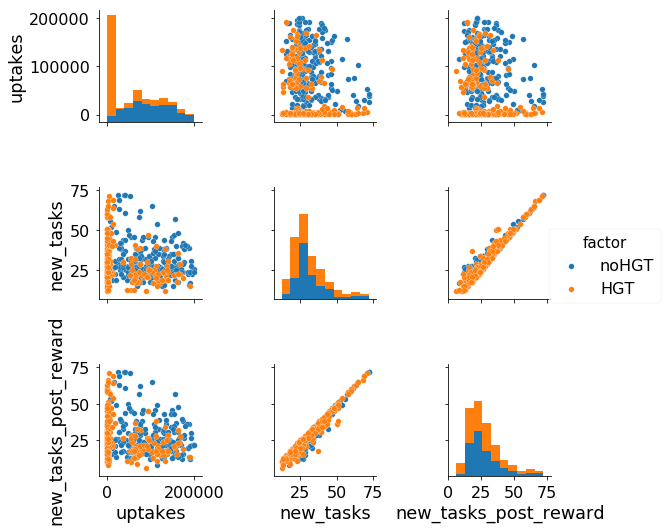

In [35]:

sns.pairplot(noHGT_HGT.loc[noHGT_HGT['update'] == 400000], 
             vars=['uptakes', 'new_tasks', 'new_tasks_post_reward'],
            hue='factor')

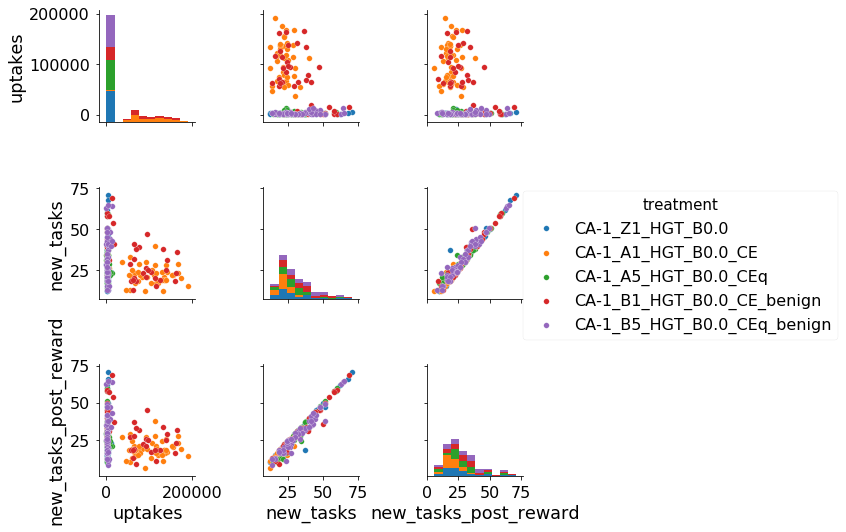

In [36]:
sns.pairplot(HGT.loc[HGT['update'] == 400000], 
             vars=['uptakes', 'new_tasks', 'new_tasks_post_reward'],
            hue='treatment')

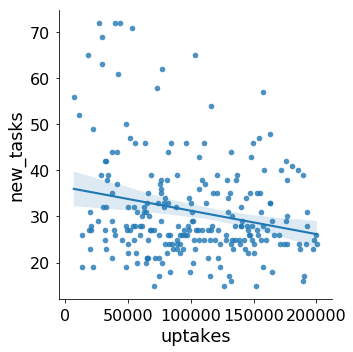

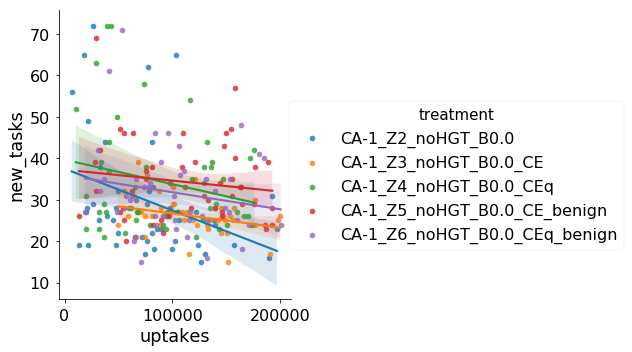

In [41]:
g = sns.lmplot(x="uptakes", y="new_tasks",
                  data=noHGT.loc[noHGT['update'] == 400000],
                  truncate=True, size=5)
plt.show()
g = sns.lmplot(x="uptakes", y="new_tasks", hue="treatment",
                  data=noHGT.loc[noHGT['update'] == 400000],
                  truncate=True, size=5)

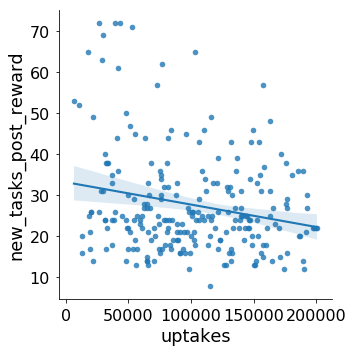

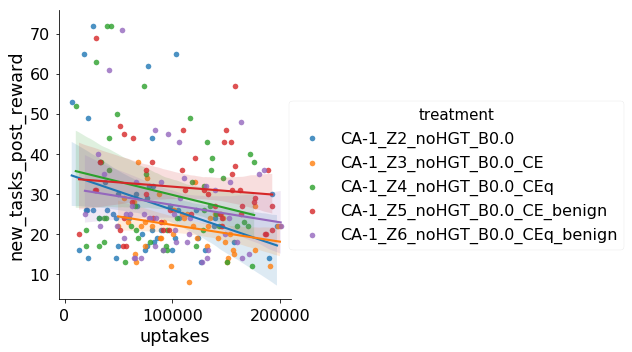

In [42]:
g = sns.lmplot(x="uptakes", y="new_tasks_post_reward",
                  data=noHGT.loc[noHGT['update'] == 400000],
                  truncate=True, size=5)
plt.show()
g = sns.lmplot(x="uptakes", y="new_tasks_post_reward", hue="treatment",
                  data=noHGT.loc[noHGT['update'] == 400000],
                  truncate=True, size=5)

In [170]:
def paired_violin_regression(part, field):
    
    def label_env(row):
        if 'CEq_benign' in row['treatment']:
            return 'CEq_benign'
        elif 'CE_benign' in row['treatment']:
            return 'CE_benign'
        elif 'CEq' in row['treatment']:
            return 'CEq'
        elif 'CE' in row['treatment']:
            return 'CE'
        else:
            return 'Static'
    part['Env'] = part.apply (lambda row: label_env(row), axis=1)
    ### Set up the canvas
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    #sns.set_context('paper', font_scale=2)
    #plt.rcParams['figure.figsize'] = (10, 5)

    correlation = ss.pearsonr(part['uptakes'], part[field])


    fig = plt.figure(figsize=(12, 3)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])


    colorp = sns.color_palette("colorblind")
#    colorp = [colorp[1], colorp[2], colorp[3], colorp[0], colorp[5]]
    colorp = ['white', colorp[2], colorp[3], colorp[0], colorp[5]]
    labels = list(part['Env'].unique())
    colors = {}
    for l,c in zip(labels,colorp):
        colors[l] = c

    sns.violinplot(x="Env", y=field, 
                   data=part, scale="count", bw=.3, inner="quart", ax=ax1,
                  palette=colors)
    sns.swarmplot(x="Env", y=field, 
              data=part, ax=ax1,
                  palette=colors,linewidth=0.3,
                  edgecolor="gray",
                 )

    ax2.scatter(part['uptakes'], part[field], 
                c=part['Env'].apply(lambda x: colors[x]),
                edgecolor='black', linewidth=0.3
               )
    sns.regplot(x="uptakes", y=field, 
                data=part, scatter=False, ax=ax2)

    #legend_patches = [matplotlib.patches.Patch(color=colors[k], label=k) for k in colors.keys()]
    #lg = plt.legend(handles=legend_patches, 
    #           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    from decimal import Decimal

    r2 = '%.2E' % Decimal(correlation[0])
    p = '%.2E' % Decimal(correlation[1])

    ann = "$r_{2}$ = " + r2 + "\n" + "$p$ = " + p

    ax2.annotate(ann, xy=(0.7,0.8),xycoords='axes fraction',
                 fontsize=14)

    ax2.set_ylim([0,80])
    #ax2.set_xlim([0,200000])
    
    plt.xticks(rotation=90)
    plt.show()

    print r2
    print p


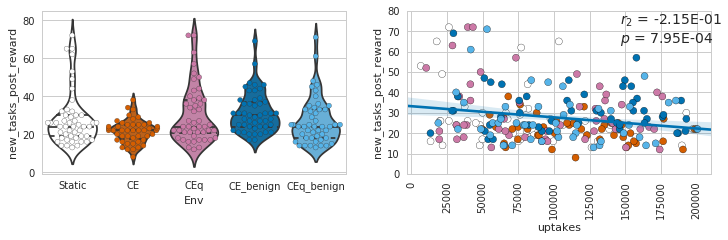

-2.15E-01
7.95E-04


In [171]:
#paired_violin_regression(noHGT.loc[noHGT['update'] == 400000], "new_tasks")
paired_violin_regression(noHGT.loc[noHGT['update'] == 400000], "new_tasks_post_reward")

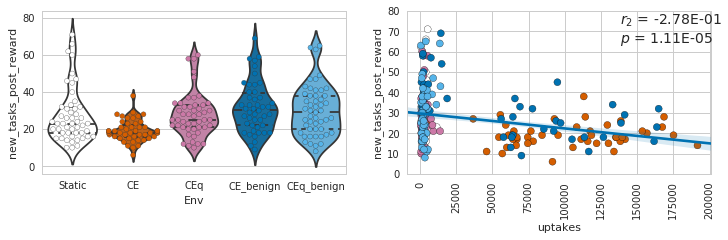

-2.78E-01
1.11E-05


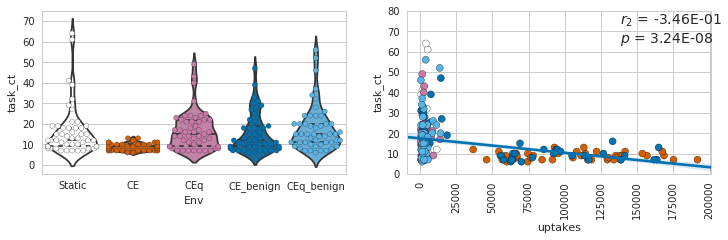

-3.46E-01
3.24E-08


In [172]:
#paired_violin_regression(HGT.loc[HGT['update'] == 400000], "new_tasks")
paired_violin_regression(HGT.loc[HGT['update'] == 400000], "new_tasks_post_reward")
paired_violin_regression(HGT.loc[HGT['update'] == 400000], "task_ct")


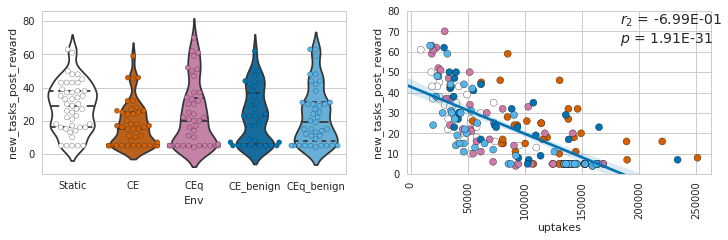

-6.99E-01
1.91E-31


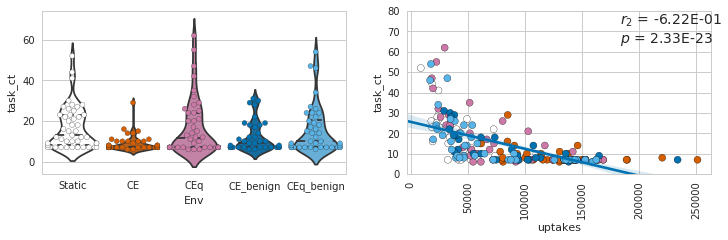

-6.22E-01
2.33E-23


In [173]:
#paired_violin_regression(B08.loc[B08['update'] == 400000], "new_tasks")

paired_violin_regression(B08.loc[B08['update'] == 400000], "new_tasks_post_reward")
paired_violin_regression(B08.loc[B08['update'] == 400000], "task_ct")

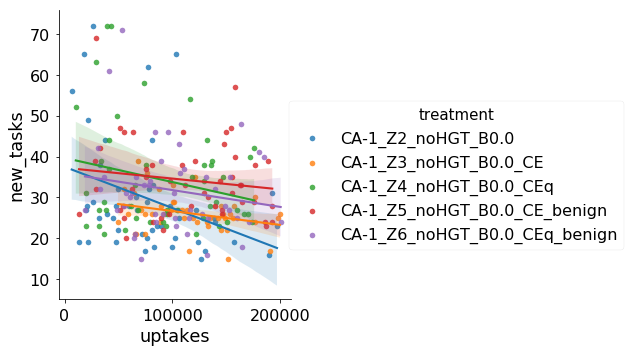

In [38]:
g = sns.lmplot(x="uptakes", y="new_tasks", hue="treatment",
                  data=noHGT.loc[noHGT['update'] == 400000],
                  truncate=True, size=5)

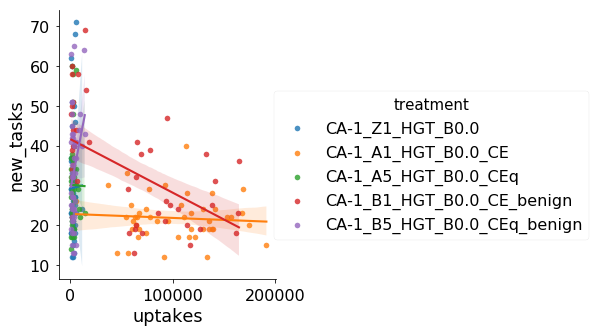

In [77]:
g = sns.lmplot(x="uptakes", y="new_tasks", hue="treatment",
                  data=HGT.loc[HGT['update'] == 400000],
                  truncate=True, size=5)

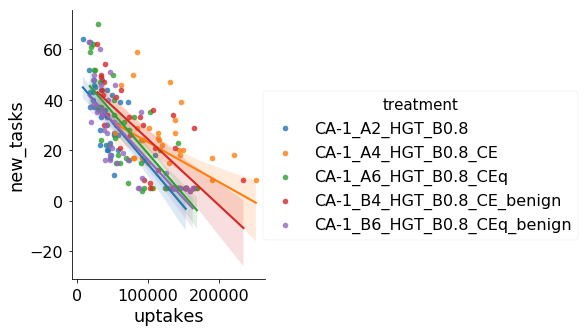

In [78]:
g = sns.lmplot(x="uptakes", y="new_tasks", hue="treatment",
                  data=B08.loc[B08['update'] == 400000],
                  truncate=True, size=5)

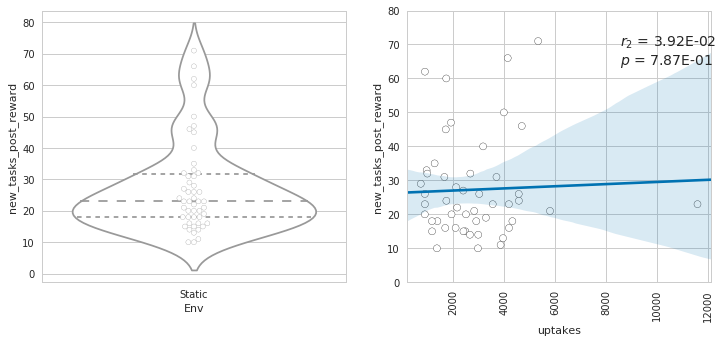

3.92E-02
7.87E-01


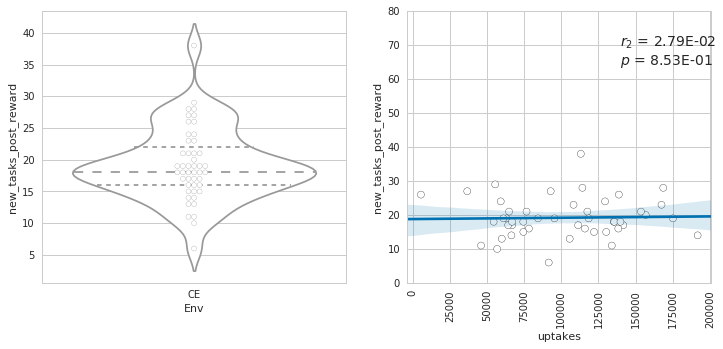

2.79E-02
8.53E-01


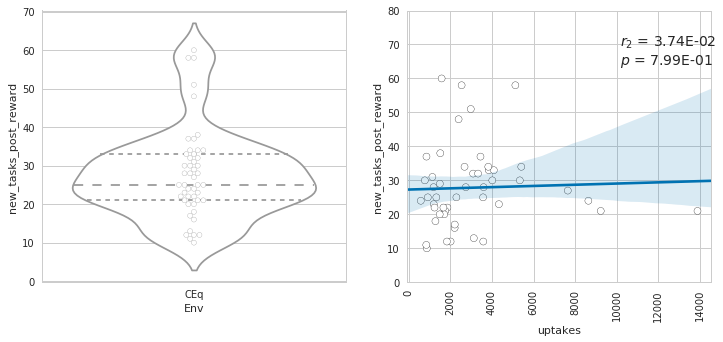

3.74E-02
7.99E-01


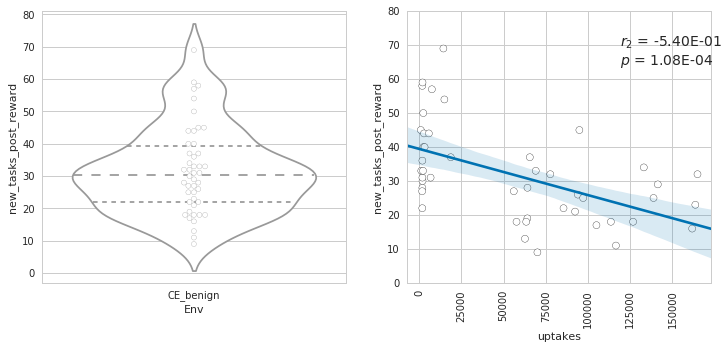

-5.40E-01
1.08E-04


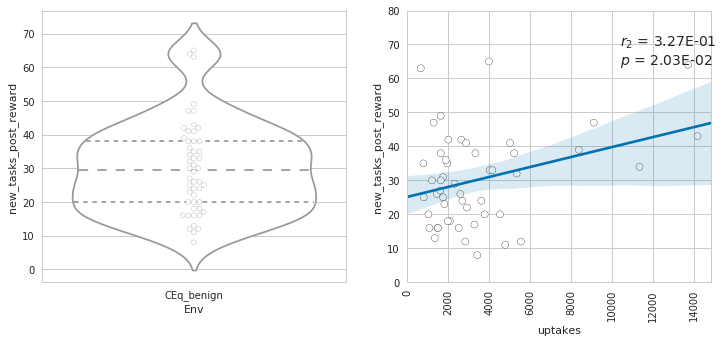

3.27E-01
2.03E-02


In [166]:
#B08 = data [(data['id'] == "A2") |
#            (data['id'] == "A4") | (data['id'] == 'A6') |
#            (data['id'] == "B4") | (data['id'] == 'B6')]
bit = data[data['id'] == 'Z1']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")
bit = data[data['id'] == 'A1']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")
bit = data[data['id'] == 'A5']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")
bit = data[data['id'] == 'B1']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")
bit = data[data['id'] == 'B5']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")

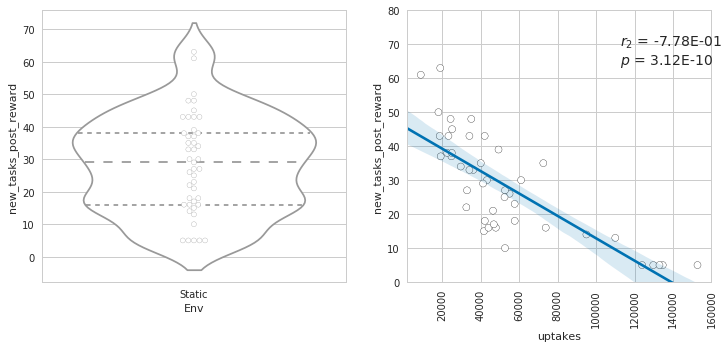

-7.78E-01
3.12E-10


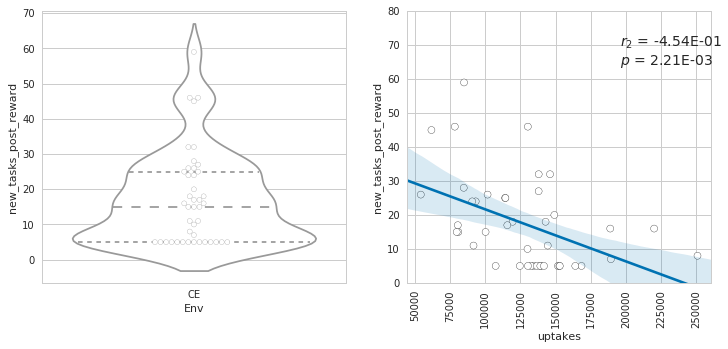

-4.54E-01
2.21E-03


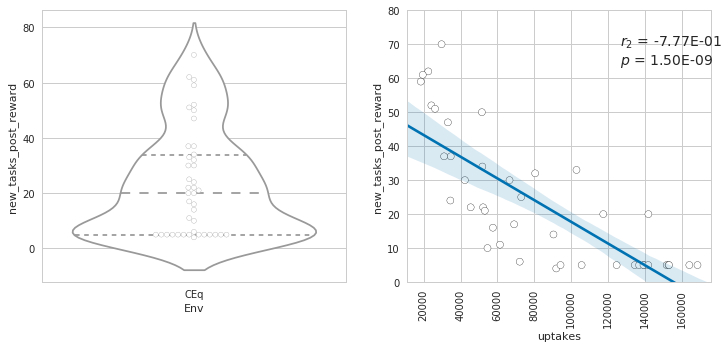

-7.77E-01
1.50E-09


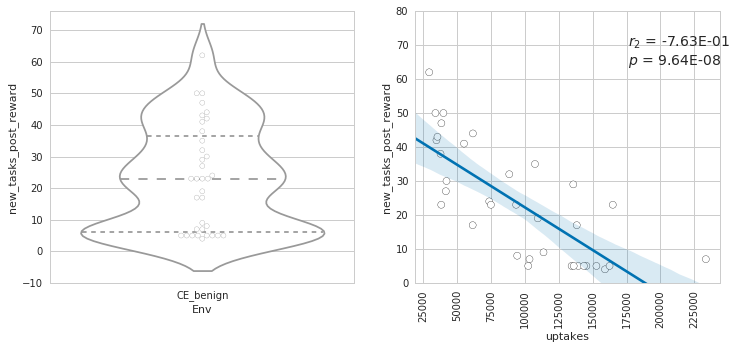

-7.63E-01
9.64E-08


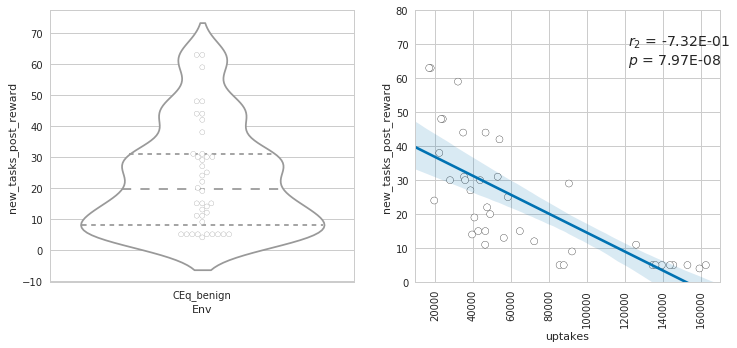

-7.32E-01
7.97E-08


In [165]:
#B08 = data [(data['id'] == "A2") |
#            (data['id'] == "A4") | (data['id'] == 'A6') |
#            (data['id'] == "B4") | (data['id'] == 'B6')]
bit = data[data['id'] == 'A2']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")
bit = data[data['id'] == 'A4']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")
bit = data[data['id'] == 'A6']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")
bit = data[data['id'] == 'B4']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")
bit = data[data['id'] == 'B6']
paired_violin_regression(bit.loc[bit['update'] == 400000], 
                         "new_tasks_post_reward")

In [162]:
data = task_perf_vs_hgt_uptakes

## matching HGT use

A1 = data[(data['id'] == 'A1') ]
A2 = data[(data['id'] == "A2") ]
A2['factor'] = ['Static B0.8'] * len(A2)
A1['factor'] = ['CE B0.0'] * len(A1)

A1_A2 = pd.concat([A2, A1])

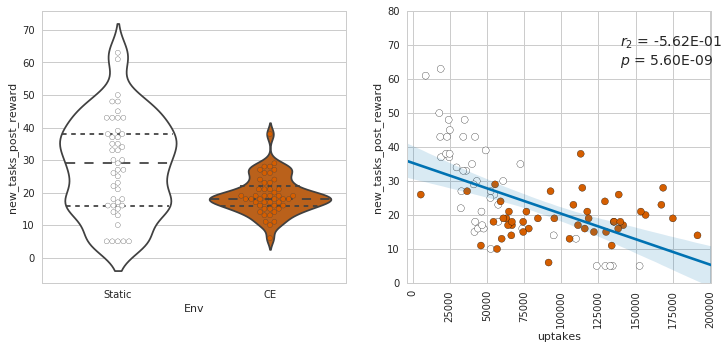

-5.62E-01
5.60E-09


In [163]:
paired_violin_regression(A1_A2.loc[A1_A2['update'] == 400000], 
                         "new_tasks_post_reward")

In [ ]:
g = sns.lmplot(x="uptakes", y="new_tasks", hue="treatment",
                  data=B08.loc[B08['update'] == 400000],
                  truncate=True, size=5)